In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading in the data
df = pd.read_csv(r'C:\Users\DELL\Desktop\dataset\new datasets\nobel laurette\complete.csv')
print(df.shape)

#Limits the df to only individuals
#df = df[df['laureate_type']=='Individual']

#drop columns not needed for the analysis
df.drop(['categoryFullName','sortOrder','portion','prizeAmount','dateAwarded','categoryTopMotivation','award_link','knownName','givenName','familyName','fullName','penName'],axis='columns',inplace=True)
df.drop(['laureate_link','birth_city','birth_country','birth_locationString','death_date','death_city','death_cityNow','death_countryNow','death_continent','death_country','death_locationString',],axis='columns',inplace=True)
df.drop(['nativeName','acronym','org_founded_date','org_founded_city','org_founded_country','org_founded_locationString','residence_1','residence_2','affiliation_1','affiliation_2','affiliation_3','affiliation_4'],axis='columns',inplace=True)

df.columns = ['year','category','prize_value','prize_status','motivation','laureate_id', 'name','gender','birth_date','birth_city','birth_continent','birth_country','organisation_name','organisation_city','organisation_continent','organisation_country','laureate_type']

#Clean the category column
df['category'] = df['category'].replace({'Economic Sciences':'Economics', 'Physiology or Medicine':'Medicine'})

#Add a decade column to the dataset
df['decade'] = (np.floor(df.year/ 10) * 10).astype(int)

#Cnanging datatypes and adding the year of birth column
df['category'] = df.category.astype('category')
df['prize_status'] =df.prize_status.astype('category')
df['motivation'] = df.motivation.astype('string')
df['name'] = df.name.astype('string')
df['year of birth'] = df['birth_date'].str.extract(r'(^\d+)-', expand=False)
df['gender'] =df.gender.astype('category')
df['birth_city'] = df.birth_city.astype('string')
df['birth_continent'] = df.birth_continent.astype('category')
df['birth_country'] = df.birth_country.astype('string')
df['organisation_name'] = df.organisation_name.astype('string')
df['organisation_city'] = df.organisation_name.astype('string')
df['organisation_continent'] = df.organisation_continent.astype('category')
df['organisation_country'] = df.organisation_country.astype('string')
df['laureate_type'] = df.laureate_type.astype('category')
df['age'] = df['year'] - df['year of birth'].astype('float')

df.drop('birth_date', inplace=True, axis = 'columns')

#min age by gender
age = df.groupby('gender').agg({'age':'min'}).reset_index()
col = ['gold' if g == age['age'].min() else 'grey' for g in age['age']]  

#multiple winners
multiple_winners = df[df['name'].duplicated(keep='first')]
multiple_winners =multiple_winners.groupby('gender')['laureate_id'].count().reset_index()

#men status
men = df[df['gender']=='male']
men_dough =  men.groupby('category').agg({'gender':'count'}).reset_index()
men_dough.columns = ['category', 'no_winners']

#women status
women = df[df['gender']=='female']
women_dough =  women.groupby('category').agg({'gender':'count'}).reset_index()
women_dough.columns = ['category', 'no_winners']
 
c1 = np.array(['gold' if c == women_dough['no_winners'].max() else 'grey' for c in women_dough['no_winners']])
c2 = np.array(['gold' if c == men_dough['no_winners'].max() else 'grey' for c in men_dough['no_winners']])


#men continents
men_cont = men.groupby('birth_continent').agg({'category':'count'}).reset_index()
men_cont.columns = ['continent', 'no_winners']
men_cont = men_cont.sort_values(by='no_winners', ascending=True)
#women continents
women_cont = women.groupby('birth_continent').agg({'category':'count'}).reset_index()
women_cont.columns = ['continent', 'no_winners']
women_cont = women_cont.sort_values(by='no_winners', ascending=True)

co1 = np.array(['gold' if c == men_cont['no_winners'].max() else 'grey' for c in men_cont['no_winners']])
co2 = np.array(['gold' if c == women_cont['no_winners'].max() else 'grey' for c in women_cont['no_winners']])

#Limit the dataframe to only include award given to individuals alone
df = df[df['laureate_type']=='Individual']

#co2

(950, 52)


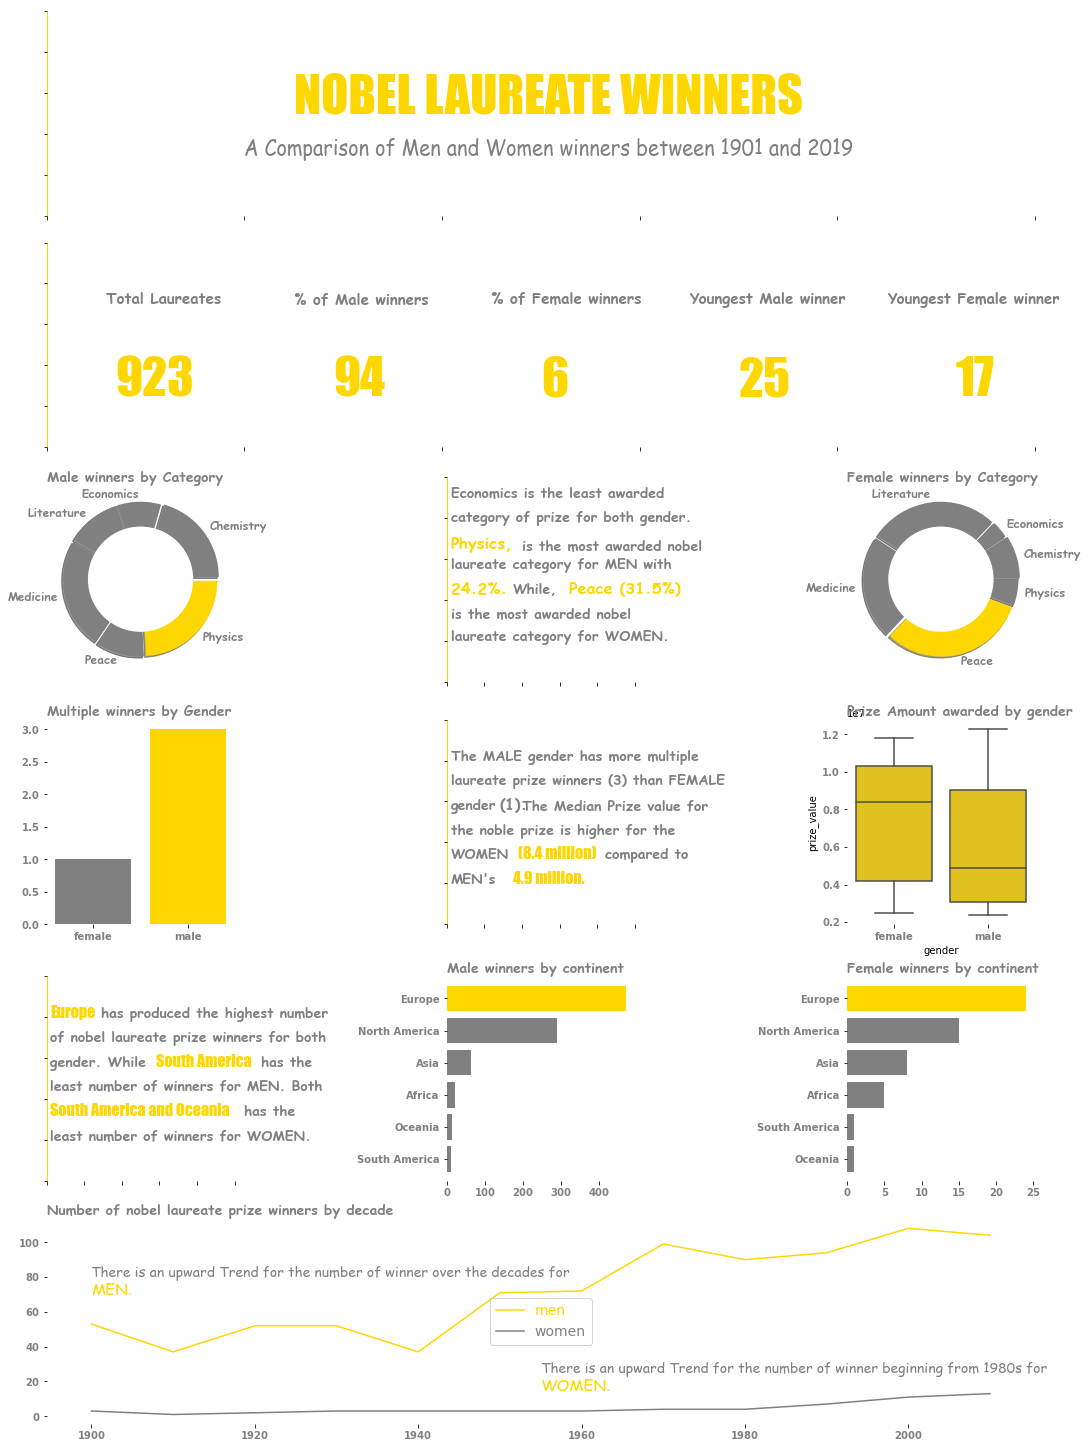

In [41]:
#Configuring the plt.figure()
fig = plt.figure(figsize=(15,20), constrained_layout=True,facecolor='white',edgecolor='blue')
spec = fig.add_gridspec(6,3)# 6 rows & 3 cols

#draw a rectangle and place it in first row, all columns
ax0 = fig.add_subplot(spec[0,:])
rec = plt.Rectangle((0,0), height = 5, width = 7, fc = 'white', ec = "gold")
fi = plt.gca()
fi.add_patch(rec)
#Hide the ticks and add text to the rectangle
plt.xticks(color='white')
plt.yticks(color='white')
plt.text(0.25,0.5,'NOBEL LAUREATE WINNERS', color = 'gold', font ='fantasy', size = 50)
plt.text(0.20,0.3,'A Comparison of Men and Women winners between 1901 and 2019', color = 'grey', size=20, font ='cursive' )
#Remove the spines from the rectangle
ax0.spines.top.set_visible(False)
ax0.spines.right.set_visible(False)
ax0.spines.left.set_visible(False)
ax0.spines.bottom.set_visible(False)

#draw another rectangle and place in across all cols in the second row
ax1 = fig.add_subplot(spec[1,:])
rec1 = plt.Rectangle((0,0), height = 5, width = 7, fc = 'white', ec = "gold")
fi = plt.gca()
fi.add_patch(rec1)
#Hide the ticks and add text to the rectangle
plt.xticks(color='white')
plt.yticks(color='white')
plt.text(0.06,0.7, f'Total Laureates', font='cursive', size = 15, weight ='heavy', color = 'grey')
plt.text(0.07,0.25,f'{len(df)}', font='fantasy',size=50,color='gold')
plt.text(0.25,0.7, f'% of Male winners', font='cursive', size = 15, weight ='heavy', color = 'grey')
plt.text(0.29,0.25,f"{round((len(men)*100)/len(df))}", font='fantasy',size=50,color='gold')
plt.text(0.45,0.7, f'% of Female winners', font='cursive', size = 15, weight ='heavy', color = 'grey')
plt.text(0.50,0.25,f"{round((len(women)*100)/len(df))}", font='fantasy',size=50,color='gold')
plt.text(0.65,0.7, f'Youngest Male winner', font='cursive', size = 15, weight ='heavy', color = 'grey')
plt.text(0.70,0.25,f"{round(men['age'].min())}", font='fantasy',size=50,color='gold')
plt.text(0.85,0.7, f'Youngest Female winner', font='cursive', size = 15, weight ='heavy', color = 'grey')
plt.text(0.92,0.25,f"{round(women['age'].min())}", font='fantasy',size=50,color='gold')
#Remove the spines from the rectangle
ax1.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.bottom.set_visible(False)

#Plotting a doughnut chart, plot a pie chart first and place it in the third row, first column
ax20 = fig.add_subplot(spec[2,0])
ex = [0.05,0.03,0.03,0.03,0.03,0.03]
plt.pie(x=men_dough.no_winners, labels=men_dough.category, explode = ex, colors = c2, textprops={'color':'grey','weight':'heavy','size':12,'font':'cursive'}, shadow = True)
#draw circle and attach it to pie chart
circle =plt.Circle((0,0),0.70,fc="white")
fg = plt.gcf() #this line gets the current figure
fg.gca().add_artist(circle)
ax20.set_title('Male winners by Category', color='grey',size=14,font='cursive',weight='heavy',pad=2,loc='left')

#Draw a Rectangle and place it in the 3 row, second column
ax21 = fig.add_subplot(spec[2,1])
rec2 = plt.Rectangle((0,0), height = 5, width = 5, fc = 'white', ec = "gold")
fi = plt.gca()
fi.add_patch(rec2)
plt.xticks(color='white')
plt.yticks(color='white')
plt.text(0.02,0.9,'Economics is the least awarded', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.78,'category of prize for both gender.', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.65,'Physics,', font='cursive',size =16, color='gold', weight = 'heavy')
plt.text(0.40,0.64,'is the most awarded nobel', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.55, 'laureate category for MEN with', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.43, '24.2%.', font='cursive',size =16, color='gold', weight = 'heavy')
plt.text(0.35,0.43, 'While,', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.65,0.43, 'Peace (31.5%)', font='cursive',size =16, color='gold', weight = 'heavy')
plt.text(0.02,0.31,'is the most awarded nobel', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.20, 'laureate category for WOMEN.', font='cursive',size =14, color='grey', weight='heavy')
ax21.spines.top.set_visible(False)
ax21.spines.right.set_visible(False)
ax21.spines.left.set_visible(False)
ax21.spines.bottom.set_visible(False)

#Plotting a doughnut chart, plot a pie chart first and place it in the third row, third column
ax22 = fig.add_subplot(spec[2,2])
ex = [0.05,0.03,0.03,0.03,0.03,0.03]
plt.pie(x=women_dough.no_winners, labels=women_dough.category,colors = c1,textprops={'color':'grey','weight':'heavy','font':'cursive','size':12}, explode = ex, shadow = True)
#draw circle and attach it to pie chart
circle =plt.Circle((0,0),0.70,fc="white")
fg = plt.gcf() #this line gets the current figure
fg.gca().add_artist(circle)
ax22.set_title('Female winners by Category', color='grey',size=14,font='cursive',weight='heavy',pad=2,loc='left')



#plot a boxplot and place it in the third column of the fourth row, add title, remove all spines except the left
ax32= fig.add_subplot(spec[3,2])
sns.boxplot(data = df,x='gender',y='prize_value', color = 'gold')
ax32.set_title('Prize Amount awarded by gender',color='grey',font='cursive',weight='heavy',size=14,pad=2,loc='left')
ax32.spines.top.set_visible(False)
ax32.spines.right.set_visible(False)
ax32.spines.left.set_visible(False)
ax32.spines.bottom.set_visible(False)
plt.xticks(color='grey',weight='heavy')
plt.yticks(color='grey', weight='heavy')
#changes the background of the graph from white to black
ax32.set_facecolor('white')

#Draw a Rectangle and place it in the fourth row, second column
ax31 = fig.add_subplot(spec[3,1])
rec3 = plt.Rectangle((0,0), height = 5, width = 5, fc = 'white', ec = "gold")
fi = plt.gca()
fi.add_patch(rec3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.text(0.02,0.8,'The MALE gender has more multiple ', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.68,'laureate prize winners (3) than FEMALE', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.56,'gender', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.28,0.56,'(1).', font='cursive',size =16, color='grey', weight='heavy')
plt.text(0.40,0.56,'The Median Prize value for', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.44,'the noble prize is higher for the', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.32,'WOMEN', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.38,0.32,'(8.4 million)', font='fantasy',size =16, color='gold', weight='heavy')
plt.text(0.84,0.32,'compared to', font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.02,0.20,"MEN's", font='cursive',size =14, color='grey', weight='heavy')
plt.text(0.35,0.20,'4.9 million.', font='fantasy',size =16, color='gold', weight='heavy')
ax31.spines.top.set_visible(False)
ax31.spines.right.set_visible(False)
ax31.spines.left.set_visible(False)
ax31.spines.bottom.set_visible(False)

#plot a barplot and place it in the first column of the fourth row, add title, remove all spines except the left
ax30 = fig.add_subplot(spec[3,0])
plt.bar(multiple_winners['gender'], multiple_winners['laureate_id'], color = ['grey', 'gold'])
ax30.set_title('Multiple winners by Gender',color='grey',weight='heavy',font='cursive',size=14,pad=2,loc='left') 
ax30.spines.top.set_visible(False)
ax30.spines.right.set_visible(False)
ax30.spines.left.set_visible(False)
ax30.spines.bottom.set_visible(False)
plt.xticks(color='grey',weight='heavy')
plt.yticks(color='grey', weight = 'heavy')
ax30.set_facecolor('white')


#Draw a Rectangle and place it in the fifth row, first column
ax40 =fig.add_subplot(spec[4,0])
rec4 = plt.Rectangle((0,0), height = 5, width = 5, fc = 'white', ec = "gold")
fi = plt.gca()
fi.add_patch(rec4)
plt.xticks(color='white')
plt.yticks(color='white')
plt.text(0.02,0.8,'Europe', size=16,font='Fantasy',weight='heavy',color ='gold' )
plt.text(0.29,0.8,'has produced the highest number', size=14,font='cursive',weight='heavy',color ='grey' )
plt.text(0.02,0.68,'of nobel laureate prize winners for both', size=14,font='cursive',weight='heavy',color ='grey')
plt.text(0.02,0.56,'gender. While', size=14,font='cursive',weight='heavy',color ='grey')
plt.text(0.58,0.56,'South America', size=16,font='fantasy',weight='heavy',color ='gold')
plt.text(1.14,0.56,'has the', size=14,font='cursive',weight='heavy',color ='grey')
plt.text(0.02,0.44,'least number of winners for MEN. Both', size=14,font='cursive',weight='heavy',color ='grey')
plt.text(0.02,0.32,'South America and Oceania', size=16,font='fantasy',weight='heavy',color ='gold')
plt.text(1.05,0.32,'has the', size=14,font='cursive',weight='heavy',color ='grey')
plt.text(0.02,0.20,'least number of winners for WOMEN.', size=14,font='cursive',weight='heavy',color ='grey')
ax40.spines.top.set_visible(False)
ax40.spines.right.set_visible(False)
ax40.spines.left.set_visible(False)
ax40.spines.bottom.set_visible(False)

#Plot a horinzontal bar graph for male no_winners per continent and place it in the fifth row, second column
ax41 =fig.add_subplot(spec[4,1])
plt.barh(men_cont['continent'], men_cont['no_winners'], color = co1)
ax41.set_facecolor('white')
plt.xticks(color='grey', weight='heavy')
plt.yticks(color='grey', weight='heavy')
ax41.set_title('Male winners by continent',color='grey',font='cursive',size=14,weight='heavy',pad=2,loc='left')
ax41.spines.top.set_visible(False)
ax41.spines.right.set_visible(False)
ax41.spines.left.set_visible(False)
ax41.spines.bottom.set_visible(False)

#Plot a horinzontal bar graph for female no_winners per continent and place it in the fifth row, second column
ax42 =fig.add_subplot(spec[4,2])
plt.barh(women_cont['continent'], women_cont['no_winners'], color = co2)
ax42.set_facecolor('white')
plt.xticks(color='grey', weight='heavy')
plt.yticks(color='grey', weight='heavy')
ax42.set_title('Female winners by continent', color='grey',font='cursive',size=14,weight='heavy',pad=2,loc='left')
ax42.spines.top.set_visible(False)
ax42.spines.right.set_visible(False)
ax42.spines.left.set_visible(False)
ax42.spines.bottom.set_visible(False)


#plot a linegraph across the fith row
ax5 = fig.add_subplot(spec[5,:])
men_dec= men.groupby('decade').agg({'category':'count'}).reset_index()
men_dec.columns = ['decade', 'no_winners']
plt.plot(men_dec['decade'],men_dec['no_winners'], color='gold', label = 'men')
#calculate for women
women_dec= women.groupby('decade').agg({'category':'count'}).reset_index()
women_dec.columns = ['decade', 'no_winners']
plt.plot(women_dec['decade'],women_dec['no_winners'], color='grey', label = 'women')
plt.legend(loc= 'center', facecolor = 'white', labelcolor=['gold','grey'],fontsize=14)
plt.xticks(color='grey', weight='heavy')
plt.yticks(color='grey',weight='heavy')
ax5.set_facecolor('white')
ax5.set_title('Number of nobel laureate prize winners by decade',pad=2, color='grey',font='cursive',size=14,weight='heavy',loc='left')
plt.text(1900,80,'There is an upward Trend for the number of winner over the decades for', color='grey',size=14,font='cursive')
plt.text(1900,70,'MEN.', color ='gold',size =16, font='cursive')
plt.text(1955,25,'There is an upward Trend for the number of winner beginning from 1980s for', color='grey',size=14,font='cursive')
plt.text(1955,15,'WOMEN.', color ='gold',size =16, font='cursive')
ax5.spines.top.set_visible(False)
ax5.spines.right.set_visible(False)
ax5.spines.left.set_visible(False)
ax5.spines.bottom.set_visible(False)



#Save the plot
plt.savefig(r'C:\Users\DELL\Desktop\white_nobel_dashboard.png', facecolor = 'white', edgecolor='gold')

#Show the plot
plt.show()

In [39]:
int(men['age'].min())

25